# MMT 
This is a coding excersice from Machine Medicine Technology

In [75]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ks_2samp
from statsmodels.stats.weightstats import ztest

In [76]:
#First check if we have necessary files
#current dir
cwd = os.getcwd()
!ls {cwd}

 df.csv  'MMT Analytics Test.pdf'   MMT.ipynb   moving.csv   ts.csv


# Problem 1

In [77]:
df_dataset = pd.read_csv('df.csv')
df_dataset.head()

,id,height,face,torso,left_shin,left_shin2,right_shin,shoulder,left_arm,right_arm,var1,var2,var3,var4
0,2b8cfe,718.364242,70.590966,269.515232,141.239887,207.537653,132.184916,173.261397,131.966158,133.629282,3,59,99,10
1,2b8d62,716.408785,70.291010,269.095971,140.472361,207.911572,131.975686,173.246057,131.834962,133.321101,4,59,95,10
2,2b8dc6,714.962277,70.080707,268.745611,139.719235,208.382592,131.713437,173.365407,131.959255,133.123379,2,57,96,10
3,2b8e2a,714.013129,69.785521,268.532332,138.903499,208.878420,131.519061,173.468325,132.536927,132.971018,1,59,93,10
4,2b8e8e,713.687593,69.647635,268.520798,138.292113,209.162872,131.501779,173.625843,132.877215,132.917984,5,58,96,10


In [78]:
#Gather some information of the dataset.
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1475 non-null   object 
 1   height      1475 non-null   float64
 2   face        1425 non-null   float64
 3   torso       1475 non-null   float64
 4   left_shin   1475 non-null   float64
 5   left_shin2  1470 non-null   float64
 6   right_shin  1475 non-null   float64
 7   shoulder    1474 non-null   float64
 8   left_arm    1475 non-null   float64
 9   right_arm   1475 non-null   float64
 10  var1        1475 non-null   int64  
 11  var2        1475 non-null   int64  
 12  var3        1475 non-null   int64  
 13  var4        1475 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 161.5+ KB


Since there is some missing values here, the simplest method is to fill them with the mean of respective mean of columns.

In [79]:
df_dataset.isnull().sum()

id             0
height         0
face          50
torso          0
left_shin      0
left_shin2     5
right_shin     0
shoulder       1
left_arm       0
right_arm      0
var1           0
var2           0
var3           0
var4           0
dtype: int64

In [80]:
df_dataset = df_dataset.fillna(df_dataset.mean())

/tmp/ipykernel_3611/449298446.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_dataset = df_dataset.fillna(df_dataset.mean())


In [81]:
df_dataset.isnull().sum()

id            0
height        0
face          0
torso         0
left_shin     0
left_shin2    0
right_shin    0
shoulder      0
left_arm      0
right_arm     0
var1          0
var2          0
var3          0
var4          0
dtype: int64

Good. Now we don't have any missing values now. let's proceed

In [82]:
df_dataset.columns

Index(['id', 'height', 'face', 'torso', 'left_shin', 'left_shin2',
       'right_shin', 'shoulder', 'left_arm', 'right_arm', 'var1', 'var2',
       'var3', 'var4'],
      dtype='object')

In [83]:
# Define a function to visualize two body parts. And compute relevant 
# statistics.
def body_dist(lst, data = df_dataset):
    '''
    A function that takes two body parts in a list as arguments, and 
    plot the two distributions in pixels length using seaborn.
    
    Also print out the ztest and k-s test for the two distributions.
    '''
    for items in lst:
        sns.distplot(data[items], axlabel = 'Length in pixels', 
                     label = items)
    plt.legend()
    plt.show()
    
    # Show a summary of mean, std etc.
    summary = data[lst].describe()
    
    # Compute the difference of two body parts.
    summary['diff'] = abs(summary[lst[0]] - summary[lst[1]])
    print(summary, '\n')
    
    # K-S test and ztest for the two distributions, which determine for null 
    # hypothesis if the two distributions were taken from the same
    # dataset.
    print(ks_2samp(data[lst[0]].values, data[lst[1]].values))
    ztest_result = ztest(data[lst[0]].values, data[lst[1]].values)
    print('Z-statistic : ', ztest_result[0], 
          '\np-value : ', ztest_result[1])

    
# A seaborn joint plot for better visualization the two distributions of 
# the two distributions.
def body_joint(lst, height = 5, **kwargs):
    assert len(lst) == 2
    sns.jointplot(lst[0], lst[1], data = df_dataset, height = height, 
                 **kwargs)

/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


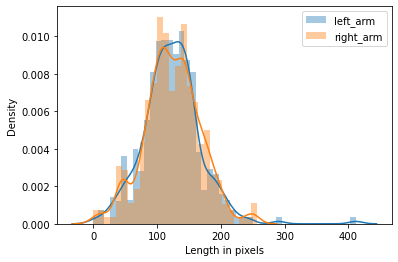

          left_arm    right_arm        diff
count  1475.000000  1475.000000    0.000000
mean    123.490944   124.180951    0.690007
std      46.060624    43.940488    2.120135
min      -1.000000    -1.000000    0.000000
25%      95.832277    97.348004    1.515727
50%     122.203820   123.985294    1.781474
75%     148.028597   151.154657    3.126061
max     412.144406   256.857427  155.286979 

KstestResult(statistic=0.059661016949152545, pvalue=0.010479241165533967)
Z-statistic :  -0.4162901690482673 
p-value :  0.6771976854691636


/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


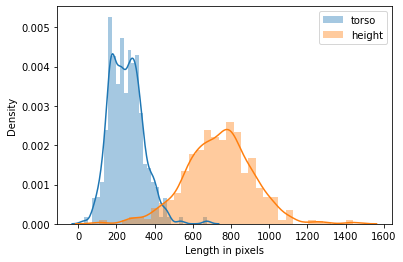

             torso       height        diff
count  1475.000000  1475.000000    0.000000
mean    251.350123   736.490845  485.140721
std      87.017097   176.959125   89.942028
min      28.810246   109.675758   80.865512
25%     183.835898   620.395227  436.559329
50%     250.059006   742.420174  492.361167
75%     305.894377   845.007426  539.113049
max     674.834123  1439.150017  764.315894 

KstestResult(statistic=0.9322033898305084, pvalue=0.0)
Z-statistic :  -94.48530553391596 
p-value :  0.0


In [84]:
# A simple test such that left arm and right arm distribution should
# be similar.
body_dist(['left_arm', 'right_arm'])

# Torso and height pixels should be somewhat related.
body_dist(['torso', 'height'])

/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


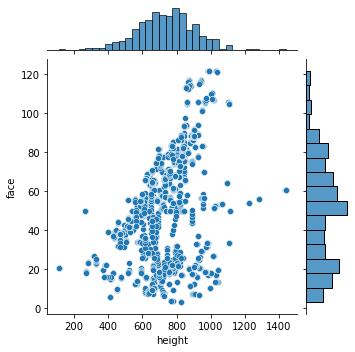

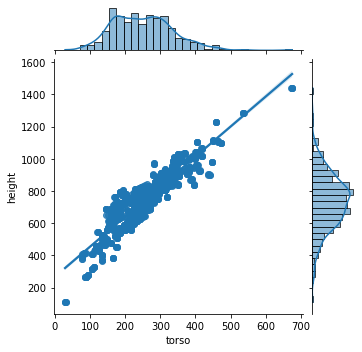

In [85]:
body_joint(['height', 'face'])
body_joint(['torso', 'height'], kind = 'reg')

The small error area of regression line show that there is indeed likely that heigh and torso pixel counts are proportional.

/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


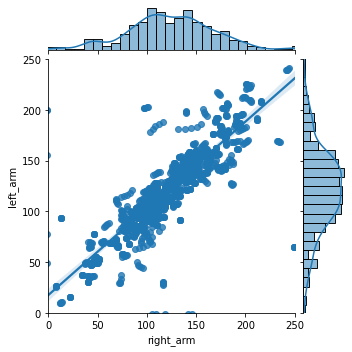

In [86]:
# Plot a seaborn joint plot to determine the 
body_joint(['right_arm', 'left_arm'], xlim = (0, 250), ylim = (0, 250), 
          kind = 'reg')

Surprisingly, left and right arms doesnt seems to correlate much, and right arm pixel counts are ever so slightly more than left arm. Would it be the angle of videos captured from stationary camera, or the fact that more people are right handed? 

# Problem 2

Let's first have a look at the unique categorical variable values.

In [87]:
var = ['var1', 'var2', 'var3', 'var4']
print(df_dataset[var].nunique())
for col in var:
    print(col, ': ', df_dataset[col].unique())

var1    5
var2    6
var3    7
var4    5
dtype: int64
var1 :  [3 4 2 1 5]
var2 :  [59 57 58 55 60 56]
var3 :  [99 95 96 93 98 94 97]
var4 :  [10 11 12 13 99]


In [88]:
def tabular_summary(body, var_lst, data = df_dataset):
    if type(var_lst) != list:
        var_lst = [var_lst]
    
    # Print the value_count for each values, in order to detect
    # skewness in data.
    for i in var_lst:
        print(data[i].value_counts(), '\n')
    data = data[[body] + var_lst]
    
    # Show the mean of body_parts pixel counts for each values.
    data_sum = data.melt(id_vars = body).groupby(['variable', 'value']).mean()
    print(data_sum)

In [89]:
tabular_summary('height', ['var1', 'var2'])

3    300
2    298
1    296
5    296
4    285
Name: var1, dtype: int64 

60    256
55    249
58    248
57    247
59    239
56    236
Name: var2, dtype: int64 

                    height
variable value            
var1     1      730.669722
         2      736.237932
         3      741.587618
         4      734.697002
         5      739.128119
var2     55     744.827278
         56     736.467573
         57     717.614667
         58     757.501156
         59     737.375580
         60     725.436652


I am not really sure what the aim of the question was. It's generally hard to determine the connection with categorical variables and numeric labels. And the mean suggest, there isn't much connection from var1, var2 to pixels count of body parts (at least for this case). Hence I have a hunch the variables are unrelated to pixels counts, or each of them only contributes in small scale. Or maybe the variables represent index instead of numeric values.

What I would like to do next is to run a Tensorflow keras sequential API, using the crosses features columns.

As the maximum number of crossed features is 7 * 6 = 42. It only make sense to determine the connection using such using a ML model.

# Problem 3
Let's have a look at the data set. Which should contain consecutive frames and distances between two body part.

In [90]:
ts_dataset = pd.read_csv('ts.csv')
ts_dataset.head()

,frame,distance
0,1,0.002885
1,2,0.002875
2,3,0.002787
3,4,0.002703
4,5,0.002558


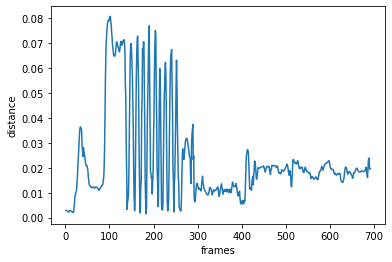

In [91]:
# A simple plot to visualize the fluctuation of distances with
# movements.
plt.plot(ts_dataset['frame'], ts_dataset['distance'])
plt.xlabel('frames')
plt.ylabel('distance')
plt.show()

Now let's try to define a function that would detect the movement.

In [92]:
def detect_movement(csv, moving_coef = 0.001, static_fric = 0.00001, 
                   window = 5):
    '''
    A function that aims to detect the frames where patients are moving.
    The function used a rolling dataset to determine whether movement
    is happening.
    
    Inputs:
    csv : The csv dataset used, should contains two columns of frames
          and distances between choosen body parts.
          
    moving_coef: A coefficient determine the sensitive of detection.
                 It act as a threshold of fluctuation of distance, 
                 where the frames would considered to be tagged as 
                 'moving'.
                 
    static_fric: A coefficient determine the distances need to 
                 depart from means of previous distances in previous
                 rolling windows. Somewhat analogous to static friction
                 in physics. 
                 
    window = Number of windows used in rolling dataframe.
    
    Return:
    Two lists of starting and stopping frames.
    '''
    data = pd.read_csv(csv)
    
    # Calculate the mean of distances in previous window.
    data['mean_before'] = pd.DataFrame({'mean_before': data['distance'].
                         rolling(window).mean()})
    
    # Calculate the max and min values in the next windows.
    data['max'] = data['distance'].rolling(window).max().shift(-4)
    data['min'] = data['distance'].rolling(window).min().shift(-4)
    
    # Determine if the patient is moving in current frame.
    # Condition of movement:
    #       (1)  abs(Max - Min) in the chossen window > moving_coef
    #       (2)  abs(distance - mean(previous_windows) > static_fric
    # Return column with boolean True if moving, False otherwise.
    data['moving'] = ((abs(data['max'] - data['min']) > moving_coef) &
                      (abs(data['mean_before'] - data['distance']) 
                      > static_fric))
    
    # Determine the change in value in moving status.
    # Return column of values -1 for frame that starts moving,
    # and 1 for frames which stop the movement
    data['movement_change'] = data['moving'].shift(1) - data['moving']
    
    # Record starting and stop frame
    start = [data['frame'][x].values for x in [data['movement_change'] == -1]]
    stop = [data['frame'][x].values for x in [data['movement_change'] == 1]]
    return start[0].tolist(), stop[0].tolist()

Let's try out how the function perform with default coefficients.

In [93]:
start , stop = detect_movement('ts.csv')

In [94]:
# Define a visualizing functions, which highlights moving frames
# in yellow.
def plt_movement(start, stop):
    fig, ax = plt.subplots()
    plt.plot(ts_dataset['frame'], ts_dataset['distance'])
    for i in range(len(start)):
        ax.axvspan(start[i], stop[i], ymin=0, ymax=1, color='yellow')
    plt.show()

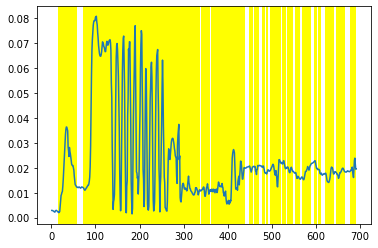

In [95]:
plt_movement(start, stop)

Oh no! The function is way too sensitive to movement. Let's increase the static friction for a bit.

In [96]:
start_high_stat , stop_high_stat = detect_movement('ts.csv',
                                                   static_fric = 0.0025)

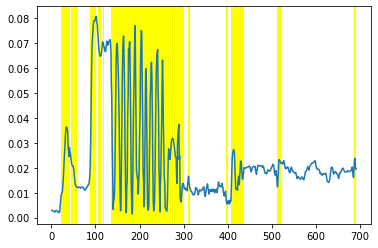

In [97]:
plt_movement(start_high_stat, stop_high_stat)

Now the function is looking much better! Since we have 3 arguments for the function, we can run a ML algorithm to fine tune the variables for the function. We can even consider adding a 'movement_friction' variable to act as threshold until the movement has stabilise (abs(current_distance - mean_of_future_distances) < movement_friction).